In [1]:
#numpy library import
import numpy as np
from sklearn.preprocessing import StandardScaler
#pandas library import
import pandas as pd
import umap
from sklearn.mixture import GaussianMixture
from yellowbrick.cluster import KElbowVisualizer


#import graphing libraries
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
training_df = pd.read_csv('Train_Arabic_Digit.txt', sep = ' ')
training_df =training_df.drop(['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'], axis=1)
print(training_df.shape)

test_df = pd.read_csv('Test_Arabic_Digit.txt', sep = ' ')
test_df =test_df.drop(['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'], axis=1)

(269855, 6)


In [3]:
coefs = 6
numClusters = 7
print(training_df.shape[0])
zeroClusterNum = 4
oneClusterNum = 4
twoClusterNum = 5
threeClusterNum = 6
fourClusterNum = 4
fiveClusterNum = 5
sixClusterNum = 4
sevenClusterNum = 4
eightClusterNum = 7
nineClusterNum = 4

269855


In [4]:
zero = pd.DataFrame()
one = pd.DataFrame()
two = pd.DataFrame()
three = pd.DataFrame()
four = pd.DataFrame()
five = pd.DataFrame()
six = pd.DataFrame()
seven = pd.DataFrame()
eight = pd.DataFrame()
nine = pd.DataFrame()
start = 0
counter = 0
for i in range(10):
    for j in range(660):
        while not (np.isnan(training_df.iloc[counter][0])):
            counter=counter+1
            if counter == 269855:
                counter = 269856
                break
        if i == 0:
            zero = zero.append(training_df.iloc[start:counter])
        if i == 1:
            one = one.append(training_df.iloc[start:counter])
        if i == 2:
            two = two.append(training_df.iloc[start:counter])
        if i == 3:
            three = three.append(training_df.iloc[start:counter])
        if i == 4:
            four = four.append(training_df.iloc[start:counter])
        if i == 5:
            five = five.append(training_df.iloc[start:counter])
        if i == 6:
            six = six.append(training_df.iloc[start:counter])
        if i == 7:
            seven = seven.append(training_df.iloc[start:counter])
        if i == 8:
            eight = eight.append(training_df.iloc[start:counter])
        if i == 9:
            nine = nine.append(training_df.iloc[start:counter])
        start=counter+1
        counter=counter+1

In [21]:
zeroGm = GaussianMixture(n_components=zeroClusterNum, covariance_type='diag',  random_state=0).fit(zero)
oneGm = GaussianMixture(n_components=oneClusterNum, covariance_type='diag',  random_state=0).fit(one)
twoGm = GaussianMixture(n_components=twoClusterNum, covariance_type='diag',  random_state=0).fit(two)
threeGm = GaussianMixture(n_components=threeClusterNum, covariance_type='diag',  random_state=0).fit(three)
fourGm = GaussianMixture(n_components=fourClusterNum, covariance_type='diag',  random_state=0).fit(four)
fiveGm = GaussianMixture(n_components=fiveClusterNum, covariance_type='diag',  random_state=0).fit(five)
sixGm = GaussianMixture(n_components=sixClusterNum, covariance_type='diag',  random_state=0).fit(six)
sevenGm = GaussianMixture(n_components=sevenClusterNum, covariance_type='diag',  random_state=0).fit(seven)
eightGm = GaussianMixture(n_components=eightClusterNum, covariance_type='diag',  random_state=0).fit(eight)
nineGm = GaussianMixture(n_components=nineClusterNum, covariance_type='diag',  random_state=0).fit(nine)

In [22]:
print(threeGm.covariances_)

[[2.4695205  0.05494175 0.06003702 0.14874353 0.24343051 0.14466792]
 [1.25003111 2.02438298 0.83076416 0.27903028 0.3375906  0.27784754]
 [1.94247836 1.84322545 1.20236752 0.27816951 0.32302561 0.33202169]
 [3.62480518 3.67614866 0.76510292 0.74073101 0.37907387 0.35733866]
 [2.26812022 2.09304793 0.63887496 1.04616807 0.25938967 0.6014425 ]
 [1.55466411 0.73485236 0.7824665  0.716997   0.33095296 0.29703874]]


In [7]:
def gauss (x, sig, mu):
    gaussian = (2*np.pi)**(-7.0/2)*np.linalg.det(sig)**(-1.0/2)*np.exp(-0.5*np.matrix(x-mu) @ np.linalg.inv(sig) @ np.transpose(np.matrix(x-mu)))
    return float(gaussian)

In [8]:
def gaussianLikelihood (test, gm, clusterNum):
    x = np.ones(6)
    covariance0 = np.diagflat(x)
    covariance1 = np.diagflat(x)
    covariance2 = np.diagflat(x)
    covariance3 = np.diagflat(x)
    covariance4 = np.diagflat(x)
    covariance5 = np.diagflat(x)
    covariance6 = np.diagflat(x)
    covariance7 = np.diagflat(x)
    covariance8 = np.diagflat(x)
    covariance9 = np.diagflat(x)
    covariance10 = np.diagflat(x)
    covariance11 = np.diagflat(x)
    covariance12 = np.diagflat(x)
    pi0 = 0
    pi1 = 0
    pi2 = 0
    pi3 = 0
    pi4 = 0
    pi5 = 0
    pi6 = 0
    pi7 = 0
    pi8 = 0
    pi9 = 0
    pi10 = 0
    pi11 = 0
    pi12 = 0
    
    means0 = np.zeros(6)
    means1 = np.zeros(6)
    means2 = np.zeros(6)
    means3 = np.zeros(6)
    means4 = np.zeros(6)
    means5 = np.zeros(6)
    means6 = np.zeros(6)
    means7 = np.zeros(6)
    means8 = np.zeros(6)
    means9 = np.zeros(6)
    means10 = np.zeros(6)
    means11 = np.zeros(6)
    means12 = np.zeros(6)
    
    
    if clusterNum>0:
        covariance0 = covariance0*gm.covariances_[0]
        pi0 = gm.weights_[0]
        means0 = gm.means_[0]
    if clusterNum>1:
        covariance1 = covariance1*gm.covariances_[1]
        pi1 = gm.weights_[1]
        means1 = gm.means_[1]
    if clusterNum>2:
        covariance2 = covariance2*gm.covariances_[2]
        pi2 = gm.weights_[2]
        means2 = gm.means_[2]
    if clusterNum>3:
        covariance3 = covariance3*gm.covariances_[3]
        pi3 = gm.weights_[3]
        means3 = gm.means_[3]
    if clusterNum>4:
        covariance4 = covariance4*gm.covariances_[4]
        pi4 = gm.weights_[4]
        means4 = gm.means_[4]
    if clusterNum>5:
        covariance5 = covariance5*gm.covariances_[5]
        pi5 = gm.weights_[5]
        means5 = gm.means_[5]
    if clusterNum>6:
        covariance6 = covariance6*gm.covariances_[6]
        pi6 = gm.weights_[6]
        means6 = gm.means_[6]
    if clusterNum>7:
        covariance7 = covariance7*gm.covariances_[7]
        pi7 = gm.weights_[7]
        means7 = gm.means_[7]
    if clusterNum>8:
        covariance8 = covariance8*gm.covariances_[8]
        pi8 = gm.weights_[8]
        means8 = gm.means_[8]
    if clusterNum>9:
        covariance9 = covariance9*gm.covariances_[9]
        pi9 = gm.weights_[9]
        means9 = gm.means_[9]
    if clusterNum>10:
        covariance10 = covariance10*gm.covariances_[10]
        pi10 = gm.weights_[10]
        means10 = gm.means_[10]
    if clusterNum>11:
        covariance11 = covariance11*gm.covariances_[11]
        pi11 = gm.weights_[11]
        means11 = gm.means_[11]
    if clusterNum>12:
        covariance12 = covariance12*gm.covariances_[12]
        pi12 = gm.weights_[12]
        means12 = gm.means_[12]
    
    clustSum = np.zeros(test.shape[0])
    for i in range(test.shape[0]):
        x = test[i:i+1]
        clustSum[i] = np.log((pi0*gauss(x, covariance0, means0 ) + pi1*gauss(x, covariance1, means1 ) + pi2*gauss(x, covariance2, means2 ) + pi3*gauss(x, covariance3, means3 ) + pi4*gauss(x, covariance4, means4 ) + pi5*gauss(x, covariance5, means5 ) + pi6*gauss(x, covariance6, means6 ) + pi7*gauss(x, covariance7, means7 )))
    mle = np.sum(clustSum)
    return mle


In [15]:
mles = np.zeros(10)
predicted = np.zeros((2200))
actual = np.zeros((2200))
start = 0
counter = 0
digitMle = np.shape((10))
for i in (range(10)):
    for j in tqdm(range(220)):
        while not (np.isnan(test_df.iloc[counter][0])):
            if i == 9 and j == 219:
                counter = test_df.shape[0]
                break;
            counter=counter+1
        testing = test_df.iloc[start:counter].values
        mle0 = gaussianLikelihood (testing, zeroGm, zeroClusterNum)
        mle1 = gaussianLikelihood (testing, oneGm, oneClusterNum)
        mle2 = gaussianLikelihood (testing, twoGm, twoClusterNum)
        mle3 = gaussianLikelihood (testing, threeGm, threeClusterNum)
        mle4 = gaussianLikelihood (testing, fourGm, fourClusterNum)
        mle5 = gaussianLikelihood (testing, fiveGm, fiveClusterNum)
        mle6 = gaussianLikelihood (testing, sixGm, sixClusterNum)
        mle7 = gaussianLikelihood (testing, sevenGm, sevenClusterNum)
        mle8 = gaussianLikelihood (testing, eightGm, eightClusterNum)
        mle9 = gaussianLikelihood (testing, nineGm, nineClusterNum)
        likelihoods = [mle0, mle1, mle2, mle3, mle4, mle5, mle6, mle7, mle8, mle9]
        digit = np.argmax(likelihoods)
        actual[i*220+j] = i
        predicted[i*220+j] = digit
        counter = counter + 1
        start = counter

 46%|████████████████████████████████████▋                                           | 101/220 [00:46<00:55,  2.16it/s]


KeyboardInterrupt: 

In [10]:
data = {'y_Actual':    actual,
        'y_Predicted': predicted
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted  0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0
Actual                                                     
0.0        182    0    0   11    0    6   12    5    0    4
1.0          0  196    5    7    0    9    3    0    0    0
2.0          1    0  177   22    0   10    1    0    9    0
3.0          1    2    6  183    0   11    1   10    6    0
4.0          0    9    0    2  161    3    1   40    0    4
5.0          8    0    0    0    3  181   10    4    0   14
6.0         10    0    5    2    0    5  196    0    0    2
7.0          4    2    1   10   35   12    1  145    6    4
8.0          0    0   15   13    0    8    0    0  184    0
9.0         12    0    4   16    0   10    5   16    0  157


In [11]:
x = metrics.confusion_matrix(actual, predicted)
print(metrics.accuracy_score(actual, predicted))

0.8009090909090909


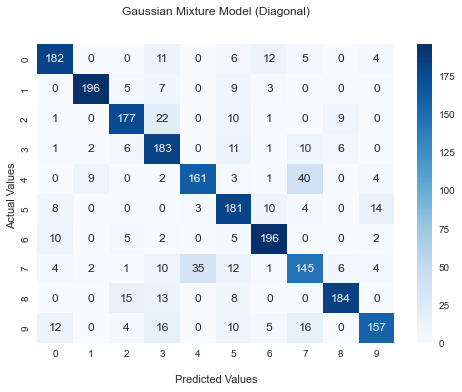

In [13]:
ax = sns.heatmap(x, annot = True, cmap = 'Blues', fmt='g')
ax.set_title('Gaussian Mixture Model (Diagonal)\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1', '2', '3', '4', '5', '6', '7', '8', '9'])
ax.yaxis.set_ticklabels(['0','1', '2', '3', '4', '5', '6', '7', '8', '9'])

## Display the visualization of the Confusion Matrix.
plt.show()